# Lab 2 - Data prep

In [1]:
%matplotlib inline

import pandas
import geopandas
import requests
from io import BytesIO

## IMD'19

In [2]:
url = ("https://assets.publishing.service.gov.uk/"\
       "government/uploads/system/uploads/"\
       "attachment_data/file/833970/"\
       "File_1_-_IMD2019_Index_of_Multiple_Deprivation.xlsx")
%time imd = pandas.read_excel(url, sheet_name="IMD2019")

CPU times: user 7.2 s, sys: 210 ms, total: 7.41 s
Wall time: 7.82 s


In [3]:
url = ("https://assets.publishing.service.gov.uk/"\
       "government/uploads/system/uploads/"\
       "attachment_data/file/833978/"\
       "File_5_-_IoD2019_Scores.xlsx")
%time imd_score = pandas.read_excel(url, sheet_name="IoD2019 Scores")

CPU times: user 16.9 s, sys: 200 ms, total: 17.1 s
Wall time: 18 s


In [4]:
imd_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 20 columns):
LSOA code (2011)                                                    32844 non-null object
LSOA name (2011)                                                    32844 non-null object
Local Authority District code (2019)                                32844 non-null object
Local Authority District name (2019)                                32844 non-null object
Index of Multiple Deprivation (IMD) Score                           32844 non-null float64
Income Score (rate)                                                 32844 non-null float64
Employment Score (rate)                                             32844 non-null float64
Education, Skills and Training Score                                32844 non-null float64
Health Deprivation and Disability Score                             32844 non-null float64
Crime Score                                                         32844 no

## LSOAs

In [5]:
base_url = ("https://services1.arcgis.com/"\
            "ESMARspQHYMw9BZ9/arcgis/rest/services/"\
            "LSOA_DEC_2011_EW_BGC/FeatureServer/0/query")

params = {
    'outSR': 4326,
    'f': 'geojson'
}

In [6]:
url = ("https://opendata.arcgis.com/datasets/"\
       "e993add3f1944437bc91ec7c76100c63_0.geojson")
%time lsoas = geopandas.read_file(url)

CPU times: user 12.3 s, sys: 2.33 s, total: 14.6 s
Wall time: 20.4 s


## Join

In [7]:
db = lsoas.join(imd.set_index("LSOA code (2011)"),
                on="LSOA11CD"
               )\
          .join(imd_score.set_index("LSOA code (2011)")\
                         .loc[:, "Index of Multiple Deprivation (IMD) Score":
                             ],
                on="LSOA11CD"
               )\
          .dropna()

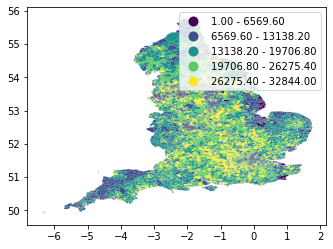

In [8]:
db.plot(column="Index of Multiple Deprivation (IMD) Rank",
        scheme="quantiles",
        legend=True
       )

## Re-project and write

In [9]:
db.to_crs(epsg=27700)\
  .to_file("imd2019.gpkg",
           driver="GPKG"
          )